In [15]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create Customer Sales data
sales_data = {  
    "OrderID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],  
    "Product": ["Laptop", "Phone", "Tablet", "Headphones", "Laptop", "Phone", "Tablet", "Laptop", "Headphones", "Phone"],  
    "CustomerID": ["C001", "C002", "C003", "C004", "C005", "C006", "C007", "C008", "C009", "C010"],  
    "Region": ["Berlin", "Munich", "Hamburg", "Berlin", "Frankfurt", "Munich", "Berlin", "Hamburg", "Frankfurt", "Berlin"],  
    "SalesAmount": [1200, 800, 600, 150, 1300, 850, 620, 1400, 160, 750],  
    "Quantity": [1, 2, 1, 3, 1, 2, 1, 1, 3, 1],  
    "OrderDate": ["2023-01-15", "2023-02-20", "2023-03-10", "2023-03-25", "2023-04-05", "2023-05-12", "2023-06-14", "2023-07-19", "2023-08-05", "2023-09-10"]  
}  
sales_df = pd.DataFrame(sales_data)  
sales_df.to_csv("sales_data.csv", index=False)  

# Create Customer Reviews Data  
reviews_data = {  
    "ReviewID": ["R001", "R002", "R003", "R004", "R005", "R006", "R007", "R008", "R009", "R010"],  
    "CustomerID": ["C001", "C002", "C003", "C004", "C005", "C006", "C007", "C008", "C009", "C010"],  
    "Product": ["Laptop", "Phone", "Tablet", "Headphones", "Laptop", "Phone", "Tablet", "Laptop", "Headphones", "Phone"],  
    "Rating": [5, 4, 3, 5, 4, 3, 4, 5, 2, 4],  
    "ReviewText": ["Amazing performance!", "Good but battery is weak.", "Decent for the price.", "Sound quality is great.", "Very fast but expensive.", "Camera is okay, not great.", "Sleek design, works well.", "Best laptop I've ever owned.", "Bass is too high, not clear.", "Good value for money."],  
    "ReviewDate": ["2023-01-16", "2023-02-21", "2023-03-11", "2023-03-26", "2023-04-06", "2023-05-13", "2023-06-15", "2023-07-20", "2023-08-06", "2023-09-11"] 
}  
reviews_df = pd.DataFrame(reviews_data)  
reviews_df.to_csv("customer_reviews.csv", index=False)  

print("CSV files created successfully!")

CSV files created successfully!


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderID      10 non-null     int64 
 1   Product      10 non-null     object
 2   CustomerID   10 non-null     object
 3   Region       10 non-null     object
 4   SalesAmount  10 non-null     int64 
 5   Quantity     10 non-null     int64 
 6   OrderDate    10 non-null     object
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


In [7]:
sales_df.to_string()

'   OrderID     Product CustomerID     Region  SalesAmount  Quantity   OrderDate\n0     1001      Laptop       C001     Berlin         1200         1  2023-01-15\n1     1002       Phone       C002     Munich          800         2  2023-02-20\n2     1003      Tablet       C003    Hamburg          600         1  2023-03-10\n3     1004  Headphones       C004     Berlin          150         3  2023-03-25\n4     1005      Laptop       C005  Frankfurt         1300         1  2023-04-05\n5     1006       Phone       C006     Munich          850         2  2023-05-12\n6     1007      Tablet       C007     Berlin          620         1  2023-06-14\n7     1008      Laptop       C008    Hamburg         1400         1  2023-07-19\n8     1009  Headphones       C009  Frankfurt          160         3  2023-08-05\n9     1010       Phone       C010     Berlin          750         1  2023-09-10'

In [9]:
sales_df.head(10)

,OrderID,Product,CustomerID,Region,SalesAmount,Quantity,OrderDate
0,1001,Laptop,C001,Berlin,1200,1,2023-01-15
1,1002,Phone,C002,Munich,800,2,2023-02-20
2,1003,Tablet,C003,Hamburg,600,1,2023-03-10
3,1004,Headphones,C004,Berlin,150,3,2023-03-25
4,1005,Laptop,C005,Frankfurt,1300,1,2023-04-05
5,1006,Phone,C006,Munich,850,2,2023-05-12
6,1007,Tablet,C007,Berlin,620,1,2023-06-14
7,1008,Laptop,C008,Hamburg,1400,1,2023-07-19
8,1009,Headphones,C009,Frankfurt,160,3,2023-08-05
9,1010,Phone,C010,Berlin,750,1,2023-09-10


In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReviewID    10 non-null     object
 1   CustomerID  10 non-null     object
 2   Product     10 non-null     object
 3   Rating      10 non-null     int64 
 4   ReviewText  10 non-null     object
 5   ReviewDate  10 non-null     object
dtypes: int64(1), object(5)
memory usage: 612.0+ bytes


In [13]:
reviews_df.head(5)

,ReviewID,CustomerID,Product,Rating,ReviewText,ReviewDate
0,R001,C001,Laptop,5,Amazing performance!,2023-01-16
1,R002,C002,Phone,4,Good but battery is weak.,2023-02-21
2,R003,C003,Tablet,3,Decent for the price.,2023-03-11
3,R004,C004,Headphones,5,Sound quality is great.,2023-03-26
4,R005,C005,Laptop,4,Very fast but expensive.,2023-04-06


In [16]:
print(sales_df.head())

   OrderID     Product CustomerID     Region  SalesAmount  Quantity  \
0     1001      Laptop       C001     Berlin         1200         1   
1     1002       Phone       C002     Munich          800         2   
2     1003      Tablet       C003    Hamburg          600         1   
3     1004  Headphones       C004     Berlin          150         3   
4     1005      Laptop       C005  Frankfurt         1300         1   

    OrderDate  
0  2023-01-15  
1  2023-02-20  
2  2023-03-10  
3  2023-03-25  
4  2023-04-05  


In [22]:
print(reviews_df.head())

  ReviewID CustomerID     Product  Rating                 ReviewText  \
0     R001       C001      Laptop       5       Amazing performance!   
1     R002       C002       Phone       4  Good but battery is weak.   
2     R003       C003      Tablet       3      Decent for the price.   
3     R004       C004  Headphones       5    Sound quality is great.   
4     R005       C005      Laptop       4   Very fast but expensive.   

   ReviewDate  
0  2023-01-16  
1  2023-02-21  
2  2023-03-11  
3  2023-03-26  
4  2023-04-06  


In [24]:
conn = sqlite3.connect("ecommerce.db")
cursor = conn.cursor()

In [26]:
# Create sales_table and review_table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales(
    OrderID INTEGER PRIMARY KEY,
    Product TEXT,
    CustomerID TEXT,
    Region TEXT,
    SalesAmount INTEGER,
    Quantity INTEGER,
    OrderDate DATE
)""")
cursor.execute("""
CREATE TABLE IF NOT EXISTS reviews (
    reviewID Text primary key,
    CustomerID TEXT,
    Product TEXT,
    Rating INTEGER,
    ReviewText TEXT,
    REviewDate DATE
    )""")

conn.commit()
    

In [28]:
# insert CSV Data into SQL Database
sales_df.to_sql("sales", conn, if_exists="replace", index=False)
reviews_df.to_sql("reviews", conn, if_exists="replace", index=False)

10

In [30]:
sales_df.to_sql("sales", conn, if_exists="replace", index=False)

10

In [32]:
reviews_df.to_sql("reviews", conn, if_exists="replace", index=False)

10

In [60]:
# SQL queries for analysis
# Find total sales by product
query = "SELECT Product, SUM(SalesAmount) as TotalSales FROM sales GROUP BY Product"
df = pd.read_sql(query, conn)
print(df)

      Product  TotalSales
0  Headphones         310
1      Laptop        3900
2       Phone        2400
3      Tablet        1220


In [39]:
# Find average rating per product
query = "SELECT Product, AVG(Rating) as AVGRating FROM reviews GROUP BY Product"
df = pd.read_sql(query, conn)
print(df)

      Product  AVGRating
0  Headphones   3.500000
1      Laptop   4.666667
2       Phone   3.666667
3      Tablet   3.500000


In [52]:
print(sales_df.columns)

Index(['OrderID', 'Product', 'CustomerID', 'Region', 'SalesAmount', 'Quantity',
       'OrderDate'],
      dtype='object')


In [56]:
print(sales_df.head(5))

   OrderID     Product CustomerID     Region  SalesAmount  Quantity  \
0     1001      Laptop       C001     Berlin         1200         1   
1     1002       Phone       C002     Munich          800         2   
2     1003      Tablet       C003    Hamburg          600         1   
3     1004  Headphones       C004     Berlin          150         3   
4     1005      Laptop       C005  Frankfurt         1300         1   

    OrderDate  
0  2023-01-15  
1  2023-02-20  
2  2023-03-10  
3  2023-03-25  
4  2023-04-05  


/var/folders/90/2r4xf5bx4csg7znn760tg7040000gn/T/ipykernel_66824/2467590724.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="TotalSales", data=df, palette="viridis")


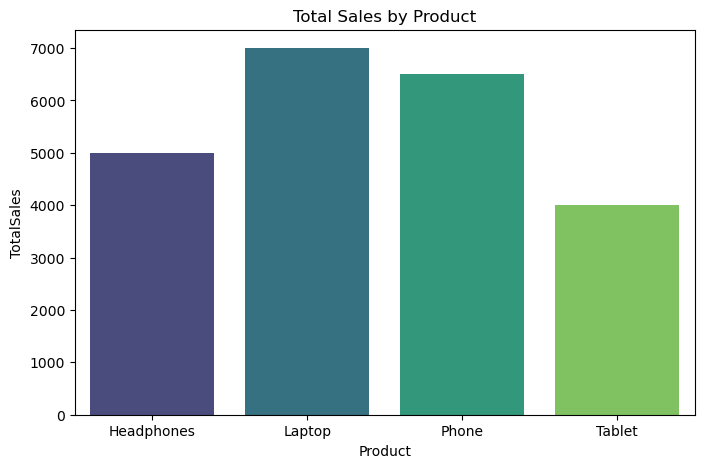

In [64]:
# Data visualisation
# Sales Distribution by products
df = pd.DataFrame({
    "Product": ["Headphones", "Laptop", "Phone", "Tablet"],
    "AVGRating": [3.5, 3.6, 3.7, 3.5],  # Your existing data
    "TotalSales": [5000, 7000, 6500, 4000]  # Manually added column
})

# Data Visualization
plt.figure(figsize=(8,5))
sns.barplot(x="Product", y="TotalSales", data=df, palette="viridis")
plt.title("Total Sales by Product")
plt.show()

/var/folders/90/2r4xf5bx4csg7znn760tg7040000gn/T/ipykernel_66824/609923615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="AvgRating", data=df, palette="coolwarm")


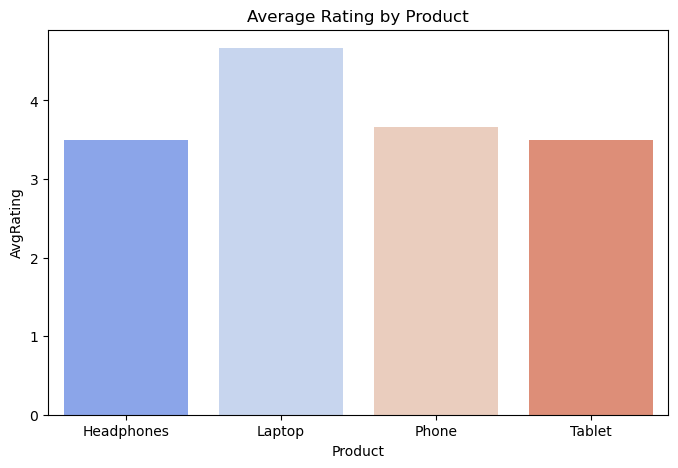

In [66]:
query = "SELECT Product, AVG(Rating) as AvgRating FROM reviews GROUP BY Product"  
df = pd.read_sql(query, conn)  

plt.figure(figsize=(8,5))  
sns.barplot(x="Product", y="AvgRating", data=df, palette="coolwarm")  
plt.title("Average Rating by Product")  
plt.show()